#Notebook des fonctions Directivite et Directivite_graphe pour antenne linéaire

Mickael Da Rocha Martins -Bilal Aloulen -Bani Mohammed-iadh -Ben Ftima Mohammed

Dans ce notebook, le centre de notre antenne est situé a l'origine [0,0]

**Directivite:**

renvoie les N_theta valeurs de la directivité en fonction du N_theta nombre d'echantillon compris entre 0 et pi, la frequence, le nombre de micros N ,la taille de l'antenne L et la direction choisi.

**Directivite_graphe:**

renvoie le diagramme de directivité de la configuration choisi.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


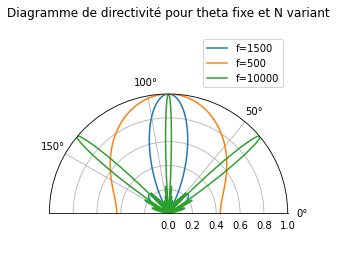

In [35]:
import numpy as np
from matplotlib import pyplot as plt

c=340  # vitesse du son
N_theta=362 #nombre d'echantillons theta
theta_all = np.linspace(0, np.pi, N_theta)  #vecteur de theta

f=1500  # frequence  
N=8     # nombre micros
L=0.793 # longueur de l'antenne linéaire

def Directivite(f,N,L,theta0):   # theta0 la direction cible 
  d= L/(N-1)
  resultat_final=[]
  N_theta = 362
  theta_all = np.linspace(0, np.pi, N_theta)

  for theta in theta_all:
    resultat = np.sin ( ((np.pi*f)/c) *N*d* (np.cos(theta0)-np.cos(theta)))  / np.sin ( (np.pi*f/c)*d*(np.cos(theta0)-np.cos(theta)))
    resultat_final.append(resultat)
  return abs(resultat_final/max(resultat_final))


##### Test pour les parametres fixes mais 3 fréquences differentes
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(theta_all,Directivite(f,9,0.4,np.pi/2), label='f=1500')
ax.set_thetamin(0)
ax.set_thetamax(180)

ax = fig.add_subplot(111, polar=True)
ax.plot(theta_all,Directivite(500,10,0.4,np.pi/2), label='f=500')
ax.set_thetamin(0)
ax.set_thetamax(180)

ax = fig.add_subplot(111, polar=True)
ax.plot(theta_all,Directivite(10000,10,0.4,np.pi/2), label='f=10000')
ax.set_thetamin(0)
ax.set_thetamax(180)
ax.set_rmax(1)

plt.legend()
plt.title("Diagramme de directivité pour theta fixe et N variant")
fig.set_tight_layout(True)

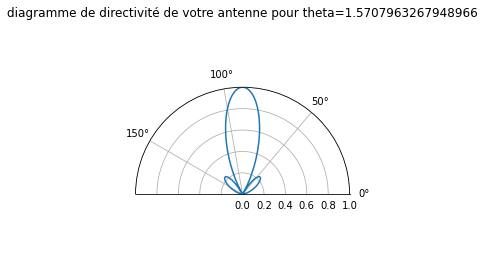

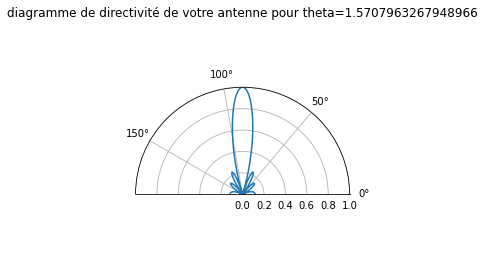

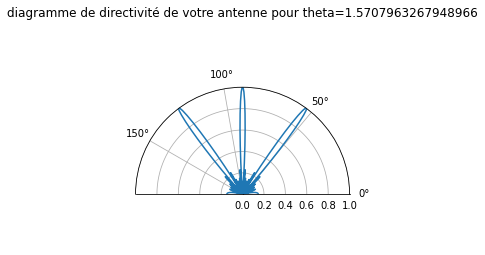

In [40]:
def Directivite_graphe(f,N,L,theta0):   # theta0  est la direction cible 
  d= L/(N-1)
  resultat_final=[]
  N_theta = 362
  theta_all = np.linspace(0, np.pi, N_theta)

  for theta in theta_all:
    resultat = np.sin ( ((np.pi*f)/c) *N*d* (np.cos(theta0)-np.cos(theta)))  / np.sin ( (np.pi*f/c)*d*(np.cos(theta0)-np.cos(theta)))
    resultat_final.append(resultat)
  fig = plt.figure()
  ax = fig.add_subplot(111, polar=True)
  ax.plot(theta_all,abs(resultat_final/max(resultat_final)))
  ax.set_thetamin(0)
  ax.set_thetamax(180)
  plt.title('diagramme de directivité de votre antenne pour theta={0}'.format(theta0))
  ax.set_rmax(1)
  fig.set_tight_layout(True)


#test de base 
#frequence 1.5kHz
Directivite_graphe(1500,8,0.4,np.pi/2)
#frequence 2.5kHz
Directivite_graphe(2500,8,0.4,np.pi/2)
#frequence 10kHz
Directivite_graphe(10000,8,0.4,np.pi/2)

#attention repliement spectral




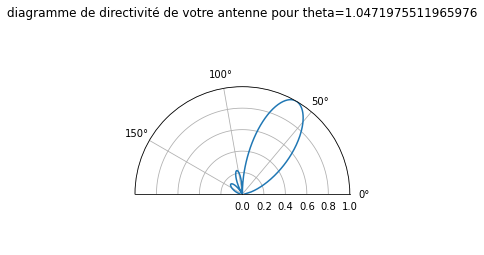

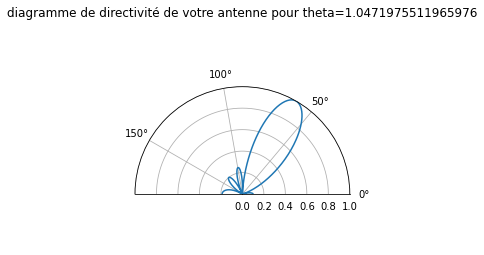

In [37]:
#test de base 
#N=10
Directivite_graphe(1500,10,0.4,np.pi/3)
#N=5
Directivite_graphe(1500,5,0.4,np.pi/3)
# joue un role sur l'amplitude des lobes secondaires

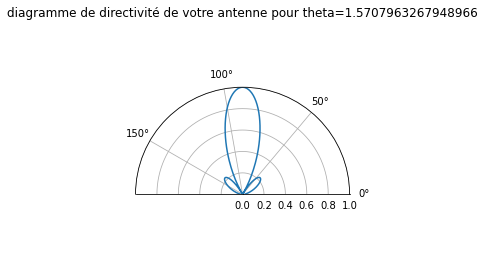

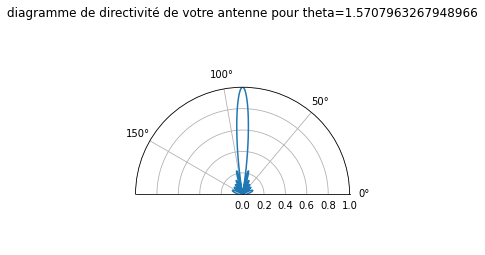

In [29]:
#test de base 
#N=10
Directivite_graphe(1500,10,0.4,np.pi/2)
#N=5
Directivite_graphe(1500,10,1.2,np.pi/2)
#joue un role pour largeur du lobe principale